In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
hd = pd.read_csv('/content/House_Pricing.csv')

In [3]:
hd.head(10)

ID Date House was Sold  Sale Price  No of Bedrooms  \
0  7129300520     14 October 2017    221900.0               3   
1  6414100192    14 December 2017    538000.0               3   
2  5631500400    15 February 2016    180000.0               2   
3  2487200875    14 December 2017    604000.0               4   
4  1954400510    15 February 2016    510000.0               3   
5  7237550310         14 May 2017   1230000.0               4   
6  1321400060        14 June 2017    257500.0               3   
7  2008000270     15 January 2016    291850.0               3   
8  2414600126       15 April 2016    229500.0               3   
9  3793500160       15 March 2016    323000.0               3   

   No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors  \
0             1.00               1180.0              5650.0           1.0   
1             2.25               2570.0              7242.0           2.0   
2             1.00                770.0             10000.0           1.0   
3             3.00               1960.0              5000.0           1.0   
4             2.00               1680.0              8080.0           1.0   
5             4.50               5420.0            101930.0           1.0   
6             2.25               1715.0              6819.0           2.0   
7             1.50               1060.0              9711.0           1.0   
8             1.00               1780.0              7470.0           1.0   
9             2.50               1890.0              6560.0           2.0   

  Waterfront View No of Times Visited  ... Overall Grade  \
0              No                 NaN  ...             7   
1              No                 NaN  ...             7   
2              No                 NaN  ...             6   
3              No                 NaN  ...             7   
4              No                 NaN  ...             8   
5              No                 NaN  ...            10   
6              No                 NaN  ...             7   
7              No                 NaN  ...             7   
8              No                 NaN  ...             7   
9              No                 NaN  ...             7   

   Area of the House from Basement (in Sqft)  Basement Area (in Sqft)  \
0                                     1180.0                        0   
1                                     2170.0                      400   
2                                      770.0                        0   
3                                     1050.0                      910   
4                                     1680.0                        0   
5                                     3890.0                     1530   
6                                     1715.0                        0   
7                                     1060.0                        0   
8                                     1050.0                      730   
9                                     1890.0                        0   

   Age of House (in Years)  Renovated Year  Zipcode  Latitude  Longitude  \
0                       63               0  98178.0   47.5112   -122.257   
1                       67            1991  98125.0   47.7210   -122.319   
2                       85               0  98028.0   47.7379   -122.233   
3                       53               0  98136.0   47.5208   -122.393   
4                       31               0  98074.0   47.6168   -122.045   
5                       17               0  98053.0   47.6561   -122.005   
6                       23               0  98003.0   47.3097   -122.327   
7                       55               0  98198.0   47.4095   -122.315   
8                       58               0  98146.0   47.5123   -122.337   
9                       15               0  98038.0   47.3684   -122.031   

   Living Area after Renovation (in Sqft)  Lot Area after Renovation (in Sqft)  
0                                  1340.0                       

In [4]:
hd.shape

(21613, 21)

In [5]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [6]:
hd.isna().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

In [7]:
hd['No of Times Visited'].unique()

array([nan, 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [8]:
# want to find the relation of "no of times visited" column to other columns

In [9]:
import missingno as msno

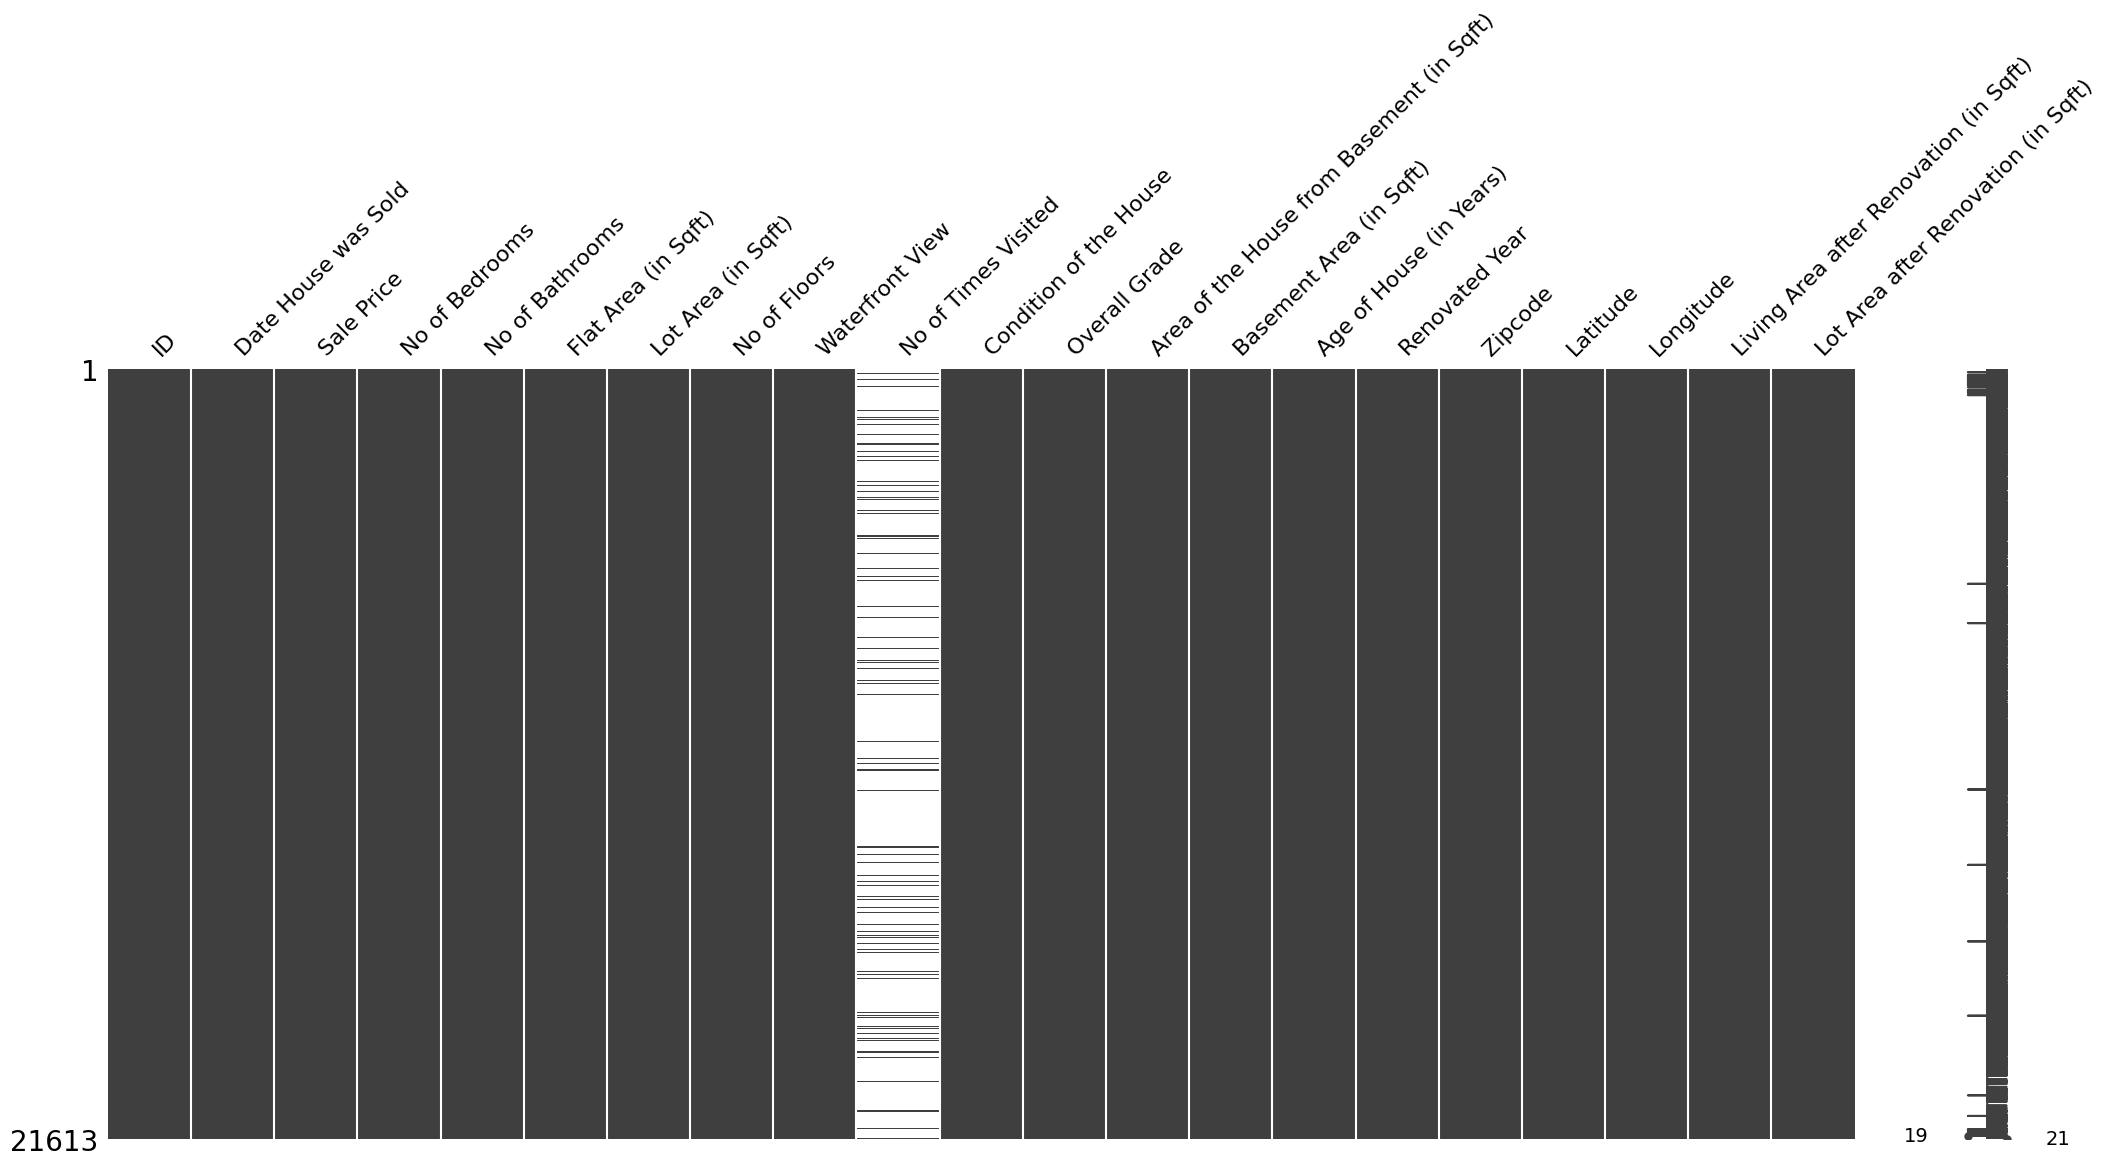

In [10]:
msno.matrix(hd)
plt.show()

In [11]:
def get_numerical_summary(hd):
    total = hd.shape[0]
    missing_columns = [col for col in hd.columns if hd[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = hd[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [12]:
missing_percent = get_numerical_summary(hd)

Sale Price : 4 (0.019%)
No of Bathrooms : 4 (0.019%)
Flat Area (in Sqft) : 9 (0.042%)
Lot Area (in Sqft) : 9 (0.042%)
No of Times Visited : 19489 (90.173%)
Area of the House from Basement (in Sqft) : 3 (0.014%)
Zipcode : 1 (0.005%)
Latitude : 1 (0.005%)
Longitude : 1 (0.005%)
Living Area after Renovation (in Sqft) : 1 (0.005%)


In [13]:
hd.drop('No of Times Visited', axis=1, inplace=True)

In [14]:
hd.shape

(21613, 20)

In [15]:
hd.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

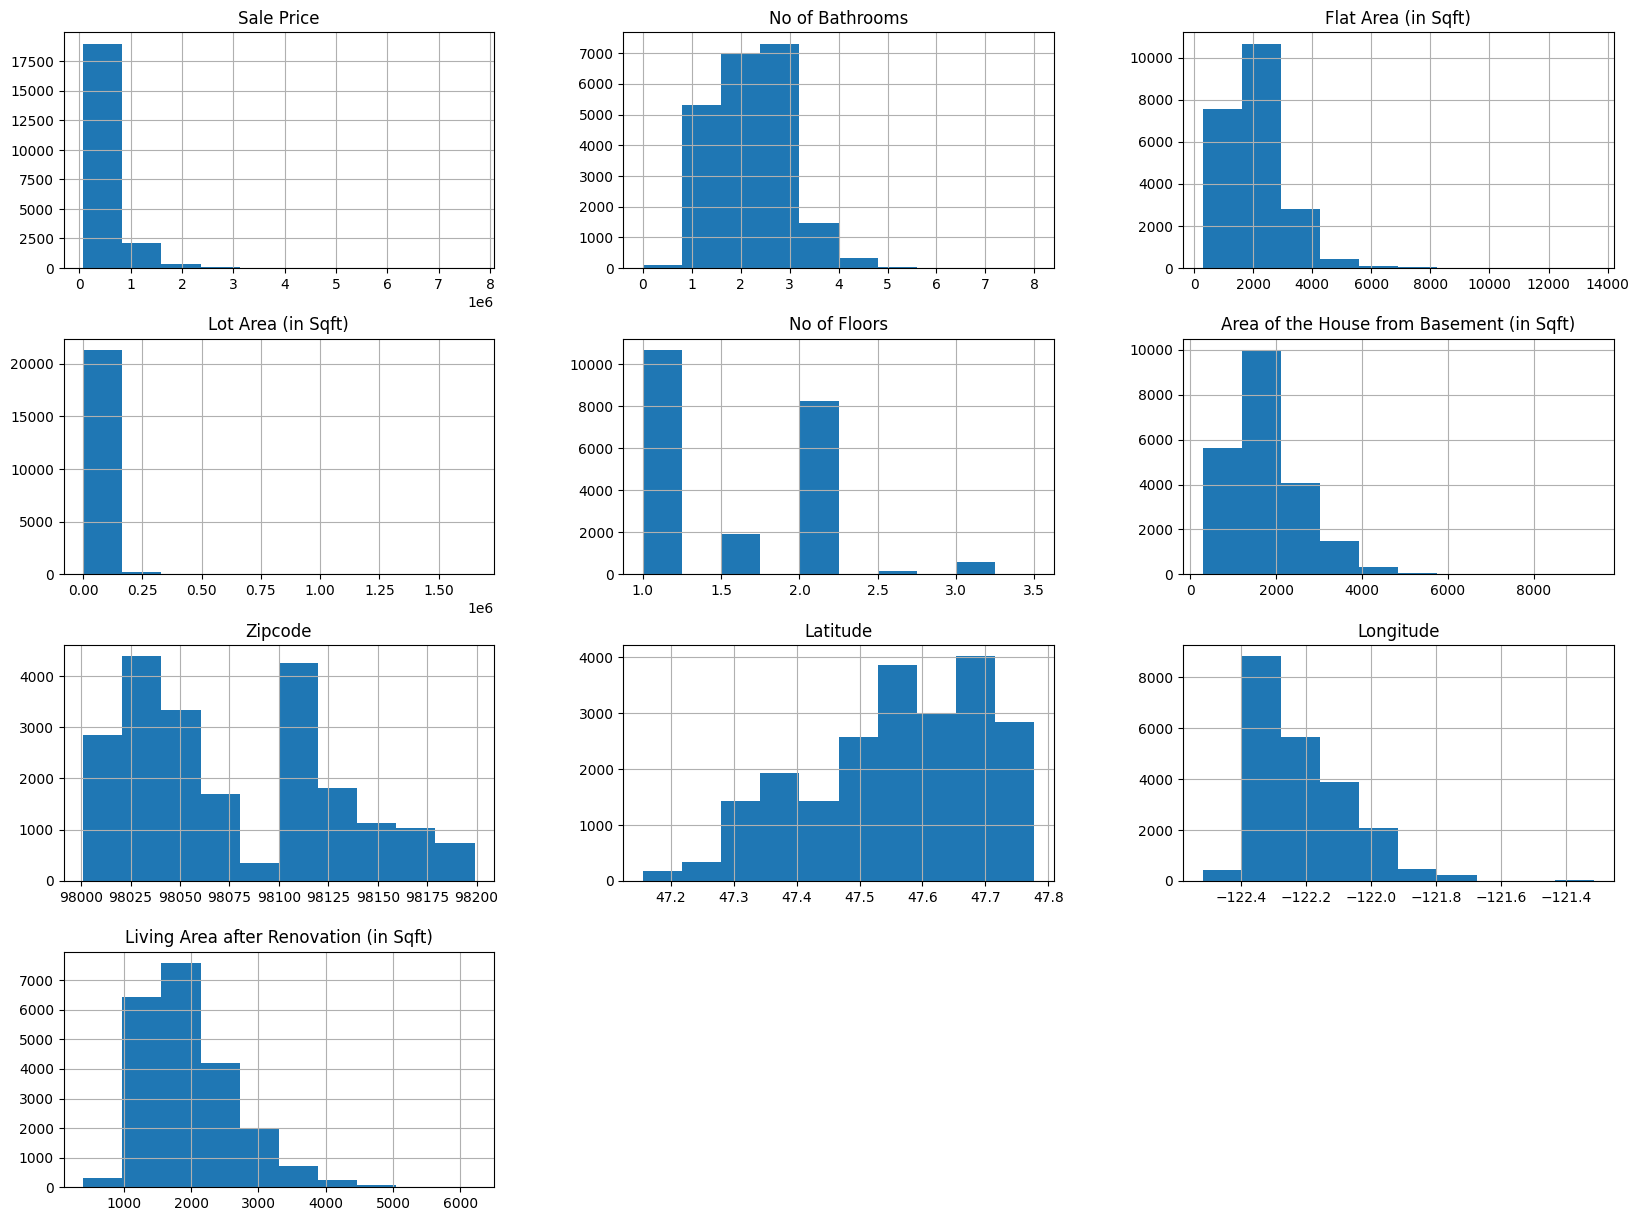

In [16]:
freqgraph = hd.select_dtypes(include =['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [17]:
hd.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'Condition of the House',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year',
       'Zipcode', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

In [18]:
# print the columns those having missing values
missing_columns =[]
for col in hd.columns:
    if hd[col].isnull().sum() > 0:
        missing_columns.append(col)

In [19]:
missing_columns

['Sale Price',
 'No of Bathrooms',
 'Flat Area (in Sqft)',
 'Lot Area (in Sqft)',
 'Area of the House from Basement (in Sqft)',
 'Zipcode',
 'Latitude',
 'Longitude',
 'Living Area after Renovation (in Sqft)']

In [20]:
missing_columns = pd.DataFrame(['Sale Price',
 'No of Bathrooms',
 'Flat Area (in Sqft)',
 'Lot Area (in Sqft)',
 'Area of the House from Basement (in Sqft)',
 'Zipcode',
 'Latitude',
 'Longitude',
 'Living Area after Renovation (in Sqft)'])

In [21]:
for col in ['Sale Price',
 'No of Bathrooms',
 'Flat Area (in Sqft)',
 'Lot Area (in Sqft)',
 'Area of the House from Basement (in Sqft)',
 'Zipcode',
 'Latitude',
 'Longitude',
 'Living Area after Renovation (in Sqft)']:
         hd[col] = hd[col].fillna(hd[col].median())

In [22]:
hd.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [23]:
# Convert 'Date House was Sold' to datetime objects
hd['Date House was Sold'] = pd.to_datetime(hd['Date House was Sold'])

# Extract numerical features from the date
hd['Year Sold'] = hd['Date House was Sold'].dt.year
hd['Month Sold'] = hd['Date House was Sold'].dt.month
hd['Day Sold'] = hd['Date House was Sold'].dt.day

# Now you can calculate the correlation
# Include only numeric columns for correlation calculation
numeric_hd = hd.select_dtypes(include=['number'])
numeric_hd.corr()

ID  Sale Price  \
ID                                         1.000000   -0.016800   
Sale Price                                -0.016800    1.000000   
No of Bedrooms                             0.001286    0.308366   
No of Bathrooms                            0.005149    0.525041   
Flat Area (in Sqft)                       -0.012388    0.702024   
Lot Area (in Sqft)                        -0.132112    0.089568   
No of Floors                               0.018525    0.256836   
Overall Grade                              0.013799    0.580644   
Area of the House from Basement (in Sqft) -0.010753    0.605344   
Basement Area (in Sqft)                   -0.005151    0.323781   
Age of House (in Years)                   -0.021380   -0.053988   
Renovated Year                            -0.016907    0.126444   
Zipcode                                   -0.008282   -0.053190   
Latitude                                  -0.001945    0.306850   
Longitude                                  0.020804    0.021538   
Living Area after Renovation (in Sqft)    -0.002881    0.585377   
Lot Area after Renovation (in Sqft)       -0.138798    0.082456   
Year Sold                                 -0.010128   -0.003551   
Month Sold                                -0.011708   -0.010060   
Day Sold                                   0.010128    0.003551   

                                           No of Bedrooms  No of Bathrooms  \
ID                                               0.001286         0.005149   
Sale Price                                       0.308366         0.525041   
No of Bedrooms                                   1.000000         0.515866   
No of Bathrooms                                  0.515866         1.000000   
Flat Area (in Sqft)                              0.576566         0.754565   
Lot Area (in Sqft)                               0.031668         0.087717   
No of Floors                                     0.175429         0.500575   
Overall Grade                                    0.349008         0.635541   
Area of the House from Basement (in Sqft)        0.477583         0.685099   
Basement Area (in Sqft)                          0.303093         0.283767   
Age of House (in Years)                         -0.154178        -0.505928   
Renovated Year                                   0.018841         0.050745   
Zipcode                                         -0.152651        -0.203965   
Latitude                                        -0.008885         0.024495   
Longitude                                        0.129494         0.223125   
Living Area after Renovation (in Sqft)           0.391651         0.568542   
Lot Area after Renovation (in Sqft)              0.029244         0.087213   
Year Sold                                        0.009838         0.026439   
Month Sold                                      -0.001533         0.007176   
Day Sold                                        -0.009838        -0.026439   

                                           Flat Area (in Sqft)  \
ID                                                   -0.012388   
Sale Price                                            0.702024   
No of Bedrooms                                        0.576566   
No of Bathrooms                                       0.754565   
Flat Area (in Sqft)                                   1.000000   
Lot Area (in Sqft)                                    0.172723   
No of Floors                                          0.353875   
Overall Grade                                         0.705666   
Area of the House from Basement (in Sqft)             0.876211   
Basement Area (in Sqft)                               0.435160   
Age of House (in Years)                              -0.318063   
Renovated Year                                        0.055380   
Zipcode                                              -0.199397   
Latitude                                              0.052518   
Longitude   

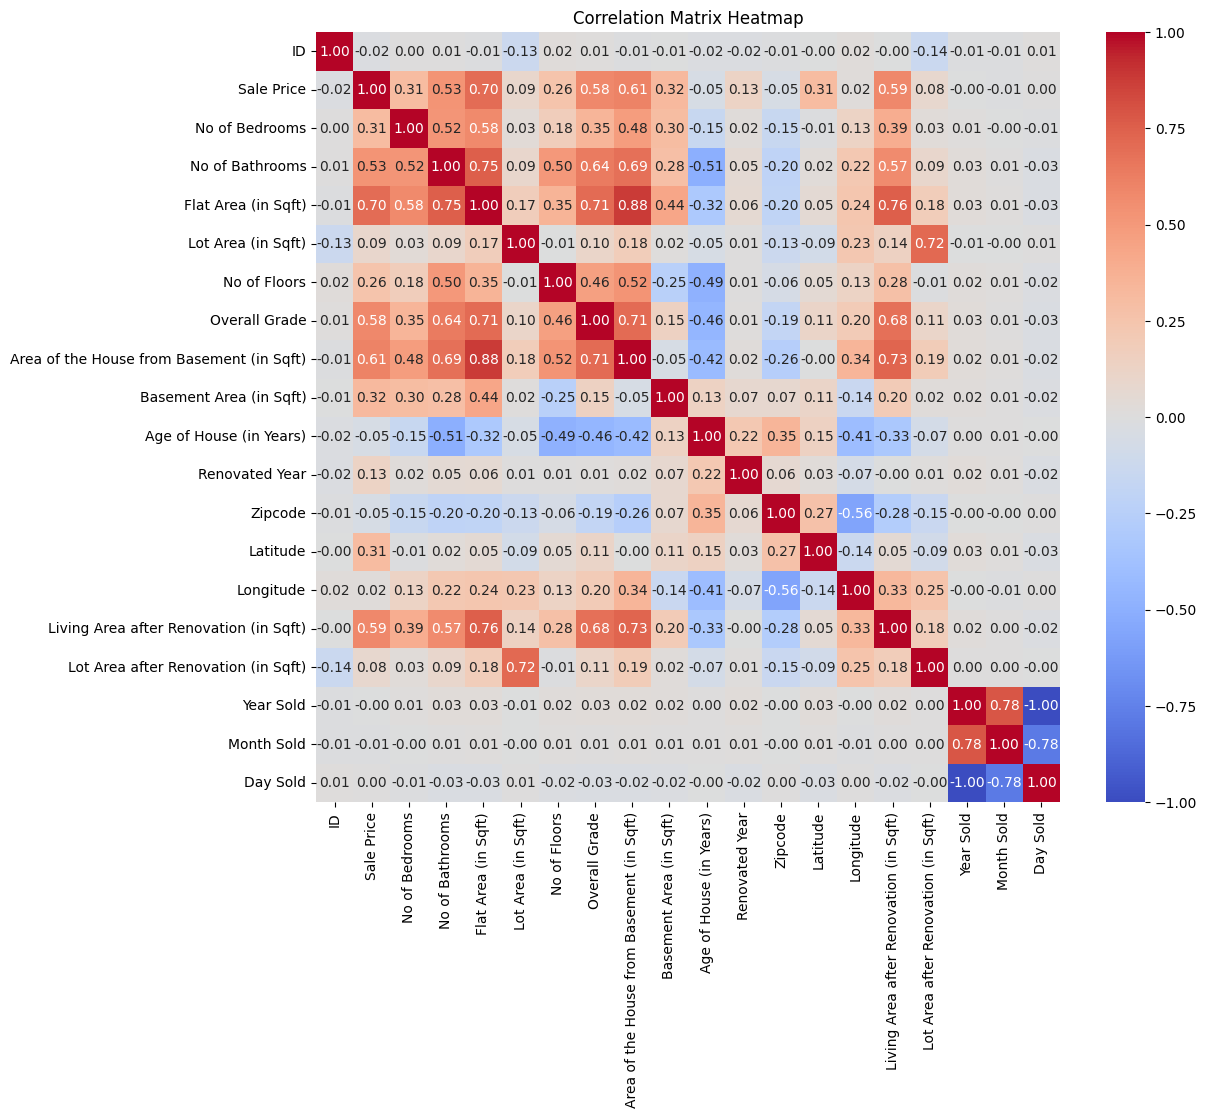

In [24]:
# prompt: plot the correlation matrix like heatmap

import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = numeric_hd.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


In [25]:
# prompt: i want to print the columns from this coorelation matrix having correlation larger than .5

# Iterate over the correlation matrix and print pairs with correlation > 0.5
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and abs(correlation_matrix[col1][col2]) > 0.7:
            print(f"Correlation between {col1} and {col2}: {correlation_matrix[col1][col2]}")


Correlation between Sale Price and Flat Area (in Sqft): 0.7020240717494249
Correlation between No of Bathrooms and Flat Area (in Sqft): 0.7545650583338295
Correlation between Flat Area (in Sqft) and Sale Price: 0.7020240717494249
Correlation between Flat Area (in Sqft) and No of Bathrooms: 0.7545650583338295
Correlation between Flat Area (in Sqft) and Overall Grade: 0.7056661542131448
Correlation between Flat Area (in Sqft) and Area of the House from Basement (in Sqft): 0.8762108879286301
Correlation between Flat Area (in Sqft) and Living Area after Renovation (in Sqft): 0.7561883251354966
Correlation between Lot Area (in Sqft) and Lot Area after Renovation (in Sqft): 0.7185307769345699
Correlation between Overall Grade and Flat Area (in Sqft): 0.7056661542131448
Correlation between Overall Grade and Area of the House from Basement (in Sqft): 0.7050719379854611
Correlation between Area of the House from Basement (in Sqft) and Flat Area (in Sqft): 0.8762108879286301
Correlation between 

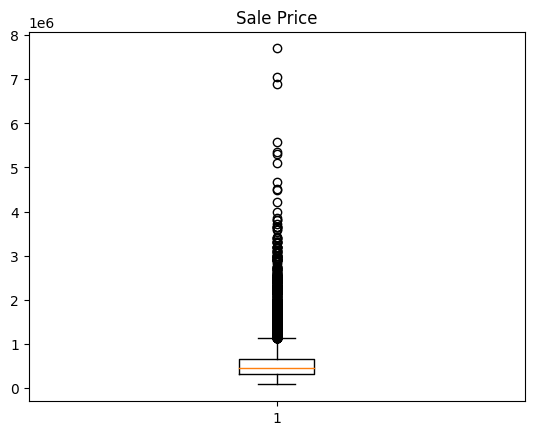

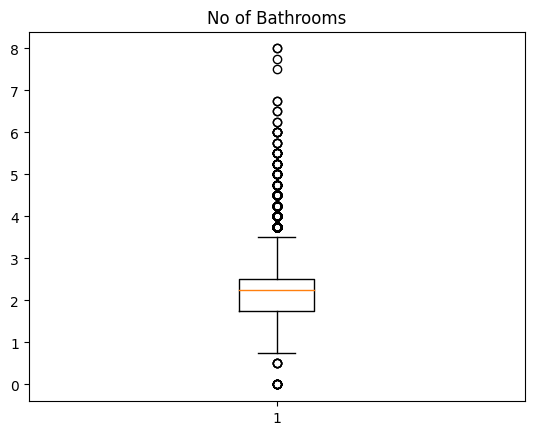

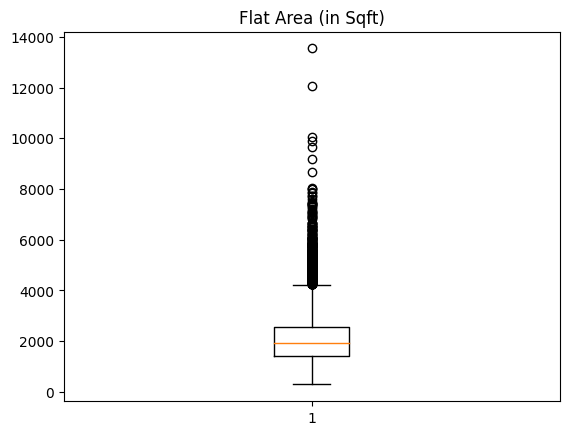

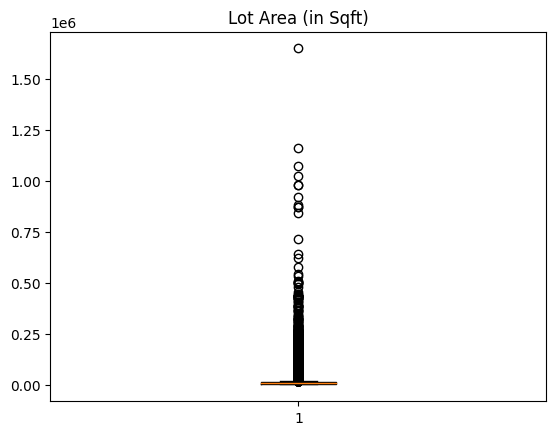

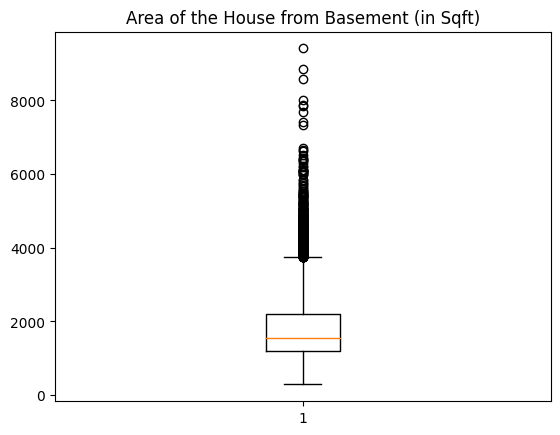

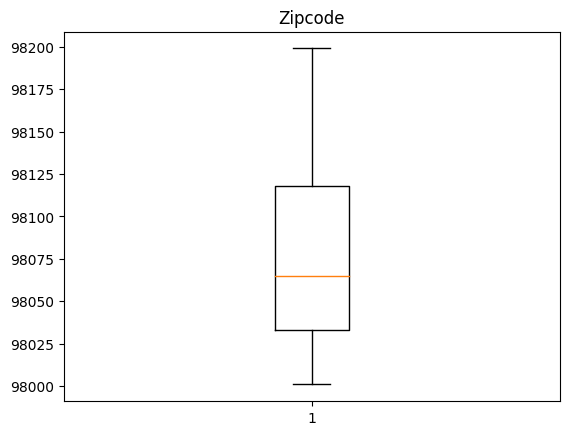

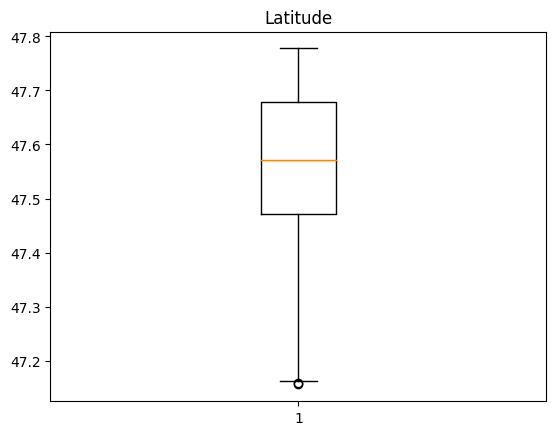

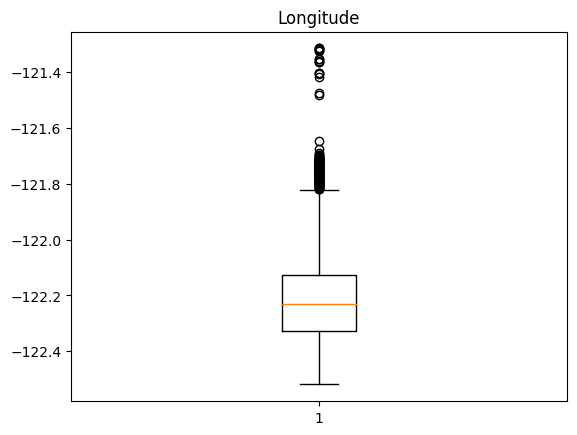

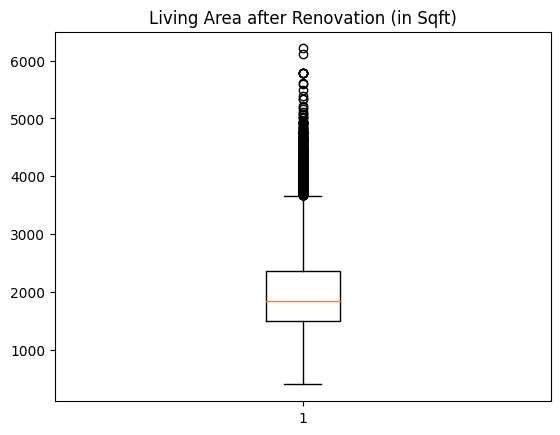

In [26]:
for i in ['Sale Price',
 'No of Bathrooms',
 'Flat Area (in Sqft)',
 'Lot Area (in Sqft)',
 'Area of the House from Basement (in Sqft)',
 'Zipcode',
 'Latitude',
 'Longitude',
 'Living Area after Renovation (in Sqft)']:
         plt.figure()
         plt.boxplot(hd[i])
         plt.title(i)

In [27]:
#printing columns having more outliers

In [28]:
outlier_columns = []
for i in ['Sale Price',
 'No of Bathrooms',
 'Flat Area (in Sqft)',
 'Lot Area (in Sqft)',
 'Area of the House from Basement (in Sqft)',
 'Zipcode',
 'Latitude',
 'Longitude',
 'Living Area after Renovation (in Sqft)']:
  # Calculate quartiles
  Q1 = hd[i].quantile(0.25)
  Q3 = hd[i].quantile(0.75)
  IQR = Q3 - Q1

  # Define outlier boundaries
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Count outliers
  outliers = hd[(hd[i] < lower_bound) | (hd[i] > upper_bound)]
  if outliers.shape[0] > 0:
    outlier_columns.append(i)
    print(f"Column '{i}' has {outliers.shape[0]} outliers.")

print("\nColumns with outliers:")
for col in outlier_columns:
    print(col)


Column 'Sale Price' has 1159 outliers.
Column 'No of Bathrooms' has 571 outliers.
Column 'Flat Area (in Sqft)' has 572 outliers.
Column 'Lot Area (in Sqft)' has 2423 outliers.
Column 'Area of the House from Basement (in Sqft)' has 610 outliers.
Column 'Latitude' has 2 outliers.
Column 'Longitude' has 256 outliers.
Column 'Living Area after Renovation (in Sqft)' has 544 outliers.

Columns with outliers:
Sale Price
No of Bathrooms
Flat Area (in Sqft)
Lot Area (in Sqft)
Area of the House from Basement (in Sqft)
Latitude
Longitude
Living Area after Renovation (in Sqft)


In [29]:
# in this lot area have more outliers than excepted so outliers should be delted

In [30]:
q1 = hd['Lot Area (in Sqft)'].quantile(0.25)
q2 = hd['Lot Area (in Sqft)'].quantile(0.50)
q3 = hd['Lot Area (in Sqft)'].quantile(0.75)


In [31]:
print(q1,q2,q3)

5040.0 7617.5 10685.0


In [32]:
iqr = q3 - q1
lc = q1 - (1.5*iqr)
uc = q3 + (1.5*iqr)

In [33]:
print (iqr,lc,uc)

5645.0 -3427.5 19152.5


In [34]:
outlier = hd[(hd['Lot Area (in Sqft)']<lc) | (hd['Lot Area (in Sqft)']>uc)].index

In [35]:
outlier

Index([    5,    12,    21,    36,    41,    49,    60,    69,    70,    74,
       ...
       21431, 21470, 21484, 21485, 21486, 21494, 21506, 21520, 21525, 21548],
      dtype='int64', length=2423)

In [36]:
hd.drop(outlier, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x79eb926db7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x79eb926dbd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x79eb926db550>],
 'medians': [<matplotlib.lines.Line2D at 0x79eb92700190>],
 'fliers': [<matplotlib.lines.Line2D at 0x79eb92700430>],
 'means': []}

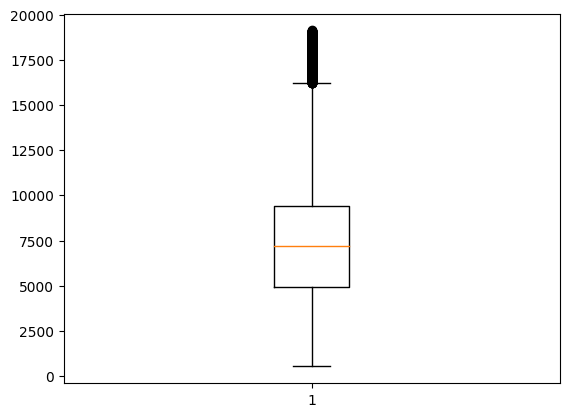

In [37]:
plt.boxplot(hd['Lot Area (in Sqft)'])

In [38]:
hd.shape

(19190, 23)

In [39]:
hd.head()

ID Date House was Sold  Sale Price  No of Bedrooms  \
0  7129300520          2017-10-14    221900.0               3   
1  6414100192          2017-12-14    538000.0               3   
2  5631500400          2016-02-15    180000.0               2   
3  2487200875          2017-12-14    604000.0               4   
4  1954400510          2016-02-15    510000.0               3   

   No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors  \
0             1.00               1180.0              5650.0           1.0   
1             2.25               2570.0              7242.0           2.0   
2             1.00                770.0             10000.0           1.0   
3             3.00               1960.0              5000.0           1.0   
4             2.00               1680.0              8080.0           1.0   

  Waterfront View Condition of the House  ...  Age of House (in Years)  \
0              No                   Fair  ...                       63   
1              No                   Fair  ...                       67   
2              No                   Fair  ...                       85   
3              No              Excellent  ...                       53   
4              No                   Fair  ...                       31   

   Renovated Year  Zipcode  Latitude  Longitude  \
0               0  98178.0   47.5112   -122.257   
1            1991  98125.0   47.7210   -122.319   
2               0  98028.0   47.7379   -122.233   
3               0  98136.0   47.5208   -122.393   
4               0  98074.0   47.6168   -122.045   

   Living Area after Renovation (in Sqft)  \
0                                  1340.0   
1                                  1690.0   
2                                  2720.0   
3                                  1360.0   
4                                  1800.0   

   Lot Area after Renovation (in Sqft)  Year Sold  Month Sold  Day Sold  
0                                 5650       2017          10        14  
1                                 7639       2017          12        14  
2                                 8062       2016           2        15  
3                                 5000       2017          12        14  
4                                 7503       2016           2        15  

[5 rows x 23 columns]

In [40]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19190 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   ID                                         19190 non-null  int64         
 1   Date House was Sold                        19190 non-null  datetime64[ns]
 2   Sale Price                                 19190 non-null  float64       
 3   No of Bedrooms                             19190 non-null  int64         
 4   No of Bathrooms                            19190 non-null  float64       
 5   Flat Area (in Sqft)                        19190 non-null  float64       
 6   Lot Area (in Sqft)                         19190 non-null  float64       
 7   No of Floors                               19190 non-null  float64       
 8   Waterfront View                            19190 non-null  object        
 9   Condition of the House

In [43]:
hd['Waterfront View'].nunique()

2

In [44]:
hd['Condition of the House'].nunique()

5

In [45]:
hd['Waterfront View'].unique()

array(['No', 'Yes'], dtype=object)

In [46]:
hd['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Okay', 'Bad'], dtype=object)

In [47]:
# ordinal encoding

In [48]:


from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder(categories=[['Bad', 'Okay', 'Fair', 'Good', 'Excellent']])
hd['Condition of the House'] = ordinal.fit_transform(hd[['Condition of the House']])


In [49]:
hd.head()

ID Date House was Sold  Sale Price  No of Bedrooms  \
0  7129300520          2017-10-14    221900.0               3   
1  6414100192          2017-12-14    538000.0               3   
2  5631500400          2016-02-15    180000.0               2   
3  2487200875          2017-12-14    604000.0               4   
4  1954400510          2016-02-15    510000.0               3   

   No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors  \
0             1.00               1180.0              5650.0           1.0   
1             2.25               2570.0              7242.0           2.0   
2             1.00                770.0             10000.0           1.0   
3             3.00               1960.0              5000.0           1.0   
4             2.00               1680.0              8080.0           1.0   

  Waterfront View  Condition of the House  ...  Age of House (in Years)  \
0              No                     2.0  ...                       63   
1              No                     2.0  ...                       67   
2              No                     2.0  ...                       85   
3              No                     4.0  ...                       53   
4              No                     2.0  ...                       31   

   Renovated Year  Zipcode  Latitude  Longitude  \
0               0  98178.0   47.5112   -122.257   
1            1991  98125.0   47.7210   -122.319   
2               0  98028.0   47.7379   -122.233   
3               0  98136.0   47.5208   -122.393   
4               0  98074.0   47.6168   -122.045   

   Living Area after Renovation (in Sqft)  \
0                                  1340.0   
1                                  1690.0   
2                                  2720.0   
3                                  1360.0   
4                                  1800.0   

   Lot Area after Renovation (in Sqft)  Year Sold  Month Sold  Day Sold  
0                                 5650       2017          10        14  
1                                 7639       2017          12        14  
2                                 8062       2016           2        15  
3                                 5000       2017          12        14  
4                                 7503       2016           2        15  

[5 rows x 23 columns]

In [50]:
ordinal = OrdinalEncoder(categories=[['No','Yes']])
hd['Waterfront View'] = ordinal.fit_transform(hd[['Waterfront View']])


In [51]:
hd.head()

ID Date House was Sold  Sale Price  No of Bedrooms  \
0  7129300520          2017-10-14    221900.0               3   
1  6414100192          2017-12-14    538000.0               3   
2  5631500400          2016-02-15    180000.0               2   
3  2487200875          2017-12-14    604000.0               4   
4  1954400510          2016-02-15    510000.0               3   

   No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors  \
0             1.00               1180.0              5650.0           1.0   
1             2.25               2570.0              7242.0           2.0   
2             1.00                770.0             10000.0           1.0   
3             3.00               1960.0              5000.0           1.0   
4             2.00               1680.0              8080.0           1.0   

   Waterfront View  Condition of the House  ...  Age of House (in Years)  \
0              0.0                     2.0  ...                       63   
1              0.0                     2.0  ...                       67   
2              0.0                     2.0  ...                       85   
3              0.0                     4.0  ...                       53   
4              0.0                     2.0  ...                       31   

   Renovated Year  Zipcode  Latitude  Longitude  \
0               0  98178.0   47.5112   -122.257   
1            1991  98125.0   47.7210   -122.319   
2               0  98028.0   47.7379   -122.233   
3               0  98136.0   47.5208   -122.393   
4               0  98074.0   47.6168   -122.045   

   Living Area after Renovation (in Sqft)  \
0                                  1340.0   
1                                  1690.0   
2                                  2720.0   
3                                  1360.0   
4                                  1800.0   

   Lot Area after Renovation (in Sqft)  Year Sold  Month Sold  Day Sold  
0                                 5650       2017          10        14  
1                                 7639       2017          12        14  
2                                 8062       2016           2        15  
3                                 5000       2017          12        14  
4                                 7503       2016           2        15  

[5 rows x 23 columns]